# <center>Classification binaire des images de type photo</center>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-01-09 10:20:34.137511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 10:20:34.137612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 10:20:34.255823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 10:20:34.369321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 10:20:37.344190: W tensorflow/compiler/tf2

In [2]:
BATCH_SIZE = 32
# IMAGE_SIZE = (90, 90)
IMAGE_SIZE = (50, 50)

### Import des données

In [3]:
def get_dataset_binaire():
    return tf.keras.utils.image_dataset_from_directory(
        "/home/nathan/AI/Projet/Dataset binaire/",
        labels="inferred",
        label_mode='binary',
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        image_size=IMAGE_SIZE,
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset="both",
        interpolation='area' #area pour rétrecir / bicubic pour élargir
    )

def get_dataset_multiclasse():
    return tf.keras.utils.image_dataset_from_directory(
        "/home/nathan/AI/Projet/Dataset multiclasse/",
        labels="inferred",
        label_mode='int',
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        image_size=IMAGE_SIZE,
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset="both",
        interpolation='area' #area pour rétrecir / bicubic pour élargir
    )

In [4]:
train_binaire, validation_binaire = get_dataset_binaire()
classes_binaire = train_binaire.class_names
train_multiclasse, validation_multiclasse = get_dataset_multiclasse()
classes_multiclasse = train_multiclasse.class_names

Found 41407 files belonging to 2 classes.
Using 33126 files for training.
Using 8281 files for validation.


2024-01-09 10:20:45.026433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-09 10:20:45.085371: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-09 10:20:45.085651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-09 10:20:45.088863: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-09 10:20:45.089035: I external/local_xla/xla/stream_executor

Classes binaire : ['Autres', 'Photo']
Found 41407 files belonging to 5 classes.
Using 33126 files for training.
Using 8281 files for validation.
Classes multiclasse : ['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


In [ ]:
print(f"Classes binaire : {classes_binaire}")
print(f"Classes multiclasse : {classes_multiclasse}")

### Exploration et visualisation des données

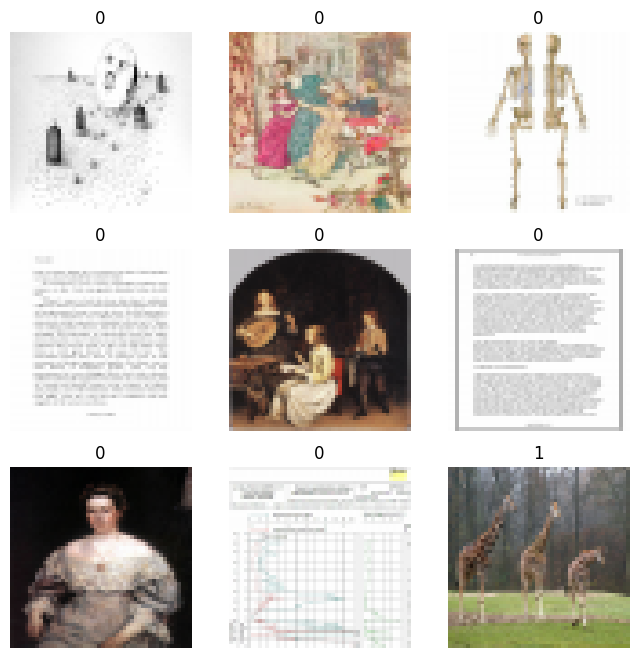

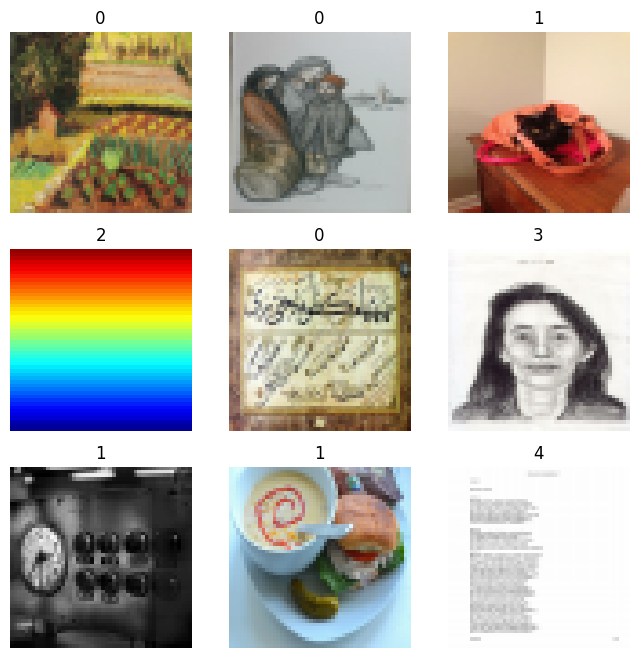

In [5]:
plt.figure(figsize=(8, 8))
for images, labels in train_binaire.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy().astype(int)[0])
        plt.axis("off")

plt.figure(figsize=(8, 8))
for images, labels in train_multiclasse.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy().astype(int))
        plt.axis("off")

In [6]:
print("Shape du dataset binaire :")
for batch in train_binaire.take(1):
    print(batch[0].shape)
    print(batch[0][0].shape)

print("\nShape du dataset multiclasse :")
for batch in train_multiclasse.take(1):
    print(batch[0].shape)
    print(batch[0][0].shape)

Shape du dataset binaire :
(32, 50, 50, 3)
(50, 50, 3)

Shape du dataset multiclasse :
(32, 50, 50, 3)
(50, 50, 3)


### Congfiguration de l'environnement pour l'entraînement

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_binaire = train_binaire.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
train_multiclasse = train_multiclasse.cache().prefetch(buffer_size=AUTOTUNE)

## 1. Models Machine Learning

### Convertir les tensors en numpy arrays

In [8]:
images_train, labels_train, images_validation, labels_validation = [], [], [], []

for image_batch, label_batch in train_binaire:
    images_train.extend(image_batch.numpy())
    labels_train.extend(label_batch.numpy())

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9
2024-01-09 10:21:08.576641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 98 of 1000
2024-01-09 10:21:18.626484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 214 of 1000
2024-01-09 10:21:38.445415: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 410 of 1000
2024-01-09 10:21:48.777309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 509 of 1000
2024-01-09 10:22:08.498035: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 711 of 1000
2024-01-09 10:22:28.478335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Shuffl

In [9]:
for image_batch, label_batch in validation_binaire:
    images_validation.extend(image_batch.numpy())
    labels_validation.extend(label_batch.numpy())

In [10]:
images_train = np.array(images_train)
images_validation = np.array(images_validation)

In [11]:
labels_train = np.array(labels_train)
labels_validation = np.array(labels_validation)

In [12]:
X_train = images_train.reshape(images_train.shape[0], -1)
y_train = labels_train.ravel()

X_validation = images_validation.reshape(images_validation.shape[0], -1)
y_validation = labels_validation.ravel()

In [13]:
print("X_train shape : {}".format(str(X_train.shape)))
print("y_train shape : {}".format(str(y_train.shape)))
print("X_validation shape : {}".format(str(X_validation.shape)))
print("y_validation shape : {}".format(str(y_validation.shape)))

X_train shape : (33126, 7500)
y_train shape : (33126,)
X_validation shape : (8281, 7500)
y_validation shape : (8281,)


### Model Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=9, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=300, random_state=42)

In [15]:
predictions_train, predictions_validation = [], []
for tree in rf.estimators_:
    predictions_train.append(tree.predict_proba(X_train)[None, :])
    predictions_validation.append(tree.predict_proba(X_validation)[None, :])

In [16]:
predictions_train = np.vstack(predictions_train)
predictions_validation = np.vstack(predictions_validation)

In [17]:
cum_mean_train = np.cumsum(predictions_train, axis=0)/np.arange(1, predictions_train.shape[0] + 1)[:, None, None]
cum_mean_validation = np.cumsum(predictions_validation, axis=0)/np.arange(1, predictions_validation.shape[0] + 1)[:, None, None]

In [18]:
scores_train, scores_validation = [], []
for pred in cum_mean_train:
    scores_train.append(accuracy_score(y_train, np.argmax(pred, axis=1)))
for pred in cum_mean_validation:
    scores_validation.append(accuracy_score(y_validation, np.argmax(pred, axis=1)))

Text(0, 0.5, 'accuracy')

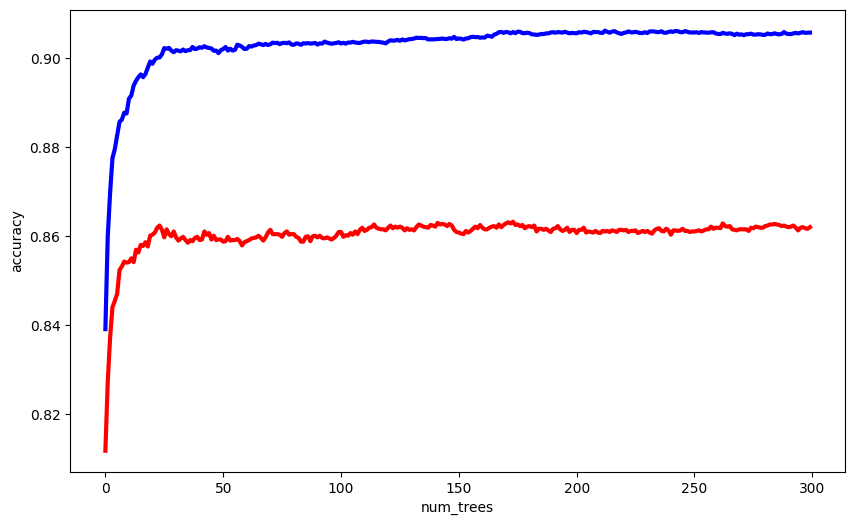

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(scores_train, linewidth=3, color="b")
plt.plot(scores_validation, linewidth=3, color="r")
plt.xlabel('num_trees')
plt.ylabel('accuracy')

In [20]:
best_n_estimators = scores_validation.index(max(scores_validation))
print(f"Meilleur n_estimator : {best_n_estimators}")

Meilleur n_estimator : 173


In [21]:
rf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=9, random_state=42)
rf.fit(X_train, y_train)

print(f"Score on train: {str(rf.score(X_train, y_train))}")
print(f"Score on validation: {str(rf.score(X_validation, y_validation))}")

y_pred_validation = rf.predict(X_validation)

cm = confusion_matrix(y_validation, y_pred_validation)

Score on train: 0.9056632252611242
Score on test: 0.8629392585436542


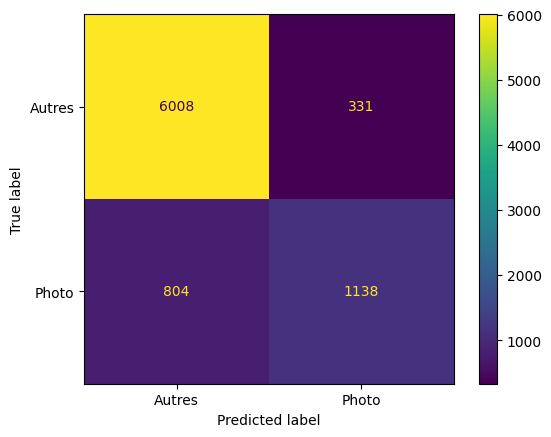

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_binaire)
disp.plot()
plt.show()